# The Diabetes Data Set

We're working in this notebook on a model that can estimate a numerical value out of numerical features. We'll be first starting with a simple example to understand what regression is about, then getting into the practical case using the `diabetes`.

## Dummy example

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
size = 1000
X = 10*np.random.rand(size, 1)
y = 6 + 3*X + np.random.randn(size, 1) + X*np.cos(3*X)

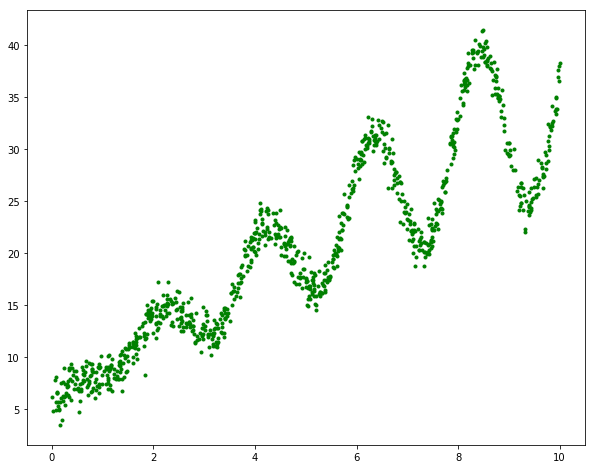

In [3]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(X, y, 'g.')

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
lin_reg = LinearRegression()

In [8]:
LinearRegression?

In [9]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
lin_reg.predict(2)

array([[12.15302581]])

There is nothing much behind the prediction for this simple model. It's only about multiplying the input by the linear coefficient and adding the intercept to it. 

In [11]:
lin_reg.coef_, lin_reg.intercept_

(array([[2.85423478]]), array([6.44455626]))

In [12]:
lin_reg.coef_*2 + lin_reg.intercept_

array([[12.15302581]])

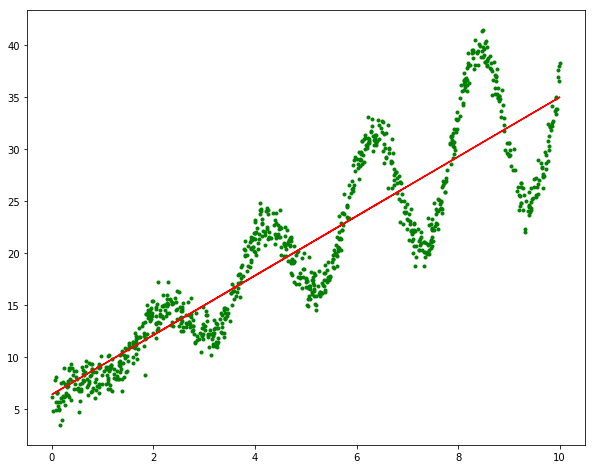

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(X, y, 'g.')
ax.plot(X, lin_reg.predict(X), 'r-')

### Evaluation

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
mean_squared_error?

In [16]:
mean_squared_error(y_test, lin_reg.predict(X_test))

15.858750749478938

In [17]:
def learning_curve(model, X, y, X_test, y_test, metric, min_index=0):
    max_index = X.shape[0]
    indexes = np.arange(min_index, max_index)
    scores_train, scores_test = [], []
    for i in range(min_index, max_index):
        X_i, y_i = X[:i], y[:i]
        model.fit(X_i, y_i)
        scores_train.append(metric(model.predict(X_i), y_i))
        scores_test.append(metric(model.predict(X_test), y_test))
    return indexes, scores_train, scores_test

In [18]:
inds, sc, sc_t = learning_curve(lin_reg, X_train, y_train, 
                                X_test, y_test, mean_squared_error, 10)

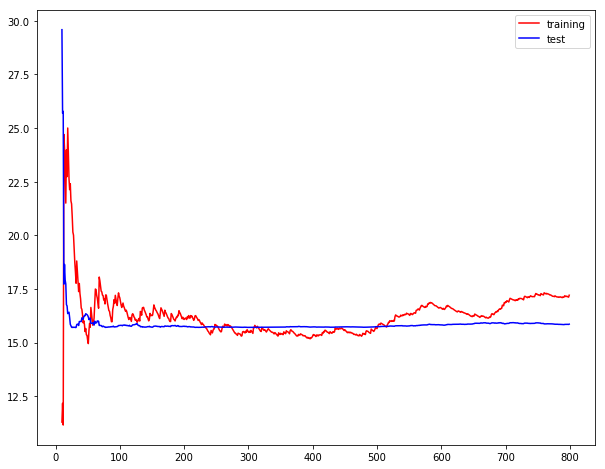

In [19]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(inds, sc, "r-", label="training")
ax.plot(inds, sc_t, "b-", label="test")
ax.legend()

### Polynomial Regression

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
PolynomialFeatures?

In [22]:
p_deg = PolynomialFeatures(30)

In [23]:
t = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
t = p_deg.fit_transform(t)

In [24]:
t.shape

(5, 31)

In [25]:
p_deg.fit(X_train)
X_d_train = p_deg.transform(X_train)
X_d_test = p_deg.transform(X_test)
X_d_train.shape, X_d_test.shape

((800, 31), (200, 31))

In [33]:
poly_reg_d = LinearRegression()

In [34]:
LinearRegression?

In [27]:
poly_reg_d.fit(X_d_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
poly_reg_d.coef_, poly_reg_d.intercept_

(array([[ 2.97571198e-16, -5.09774655e-16,  1.29906596e-18,
         -4.77223623e-21, -3.73497912e-23,  4.96316034e-25,
          2.84770407e-24,  1.62190891e-23,  9.08395042e-23,
          5.00050725e-22,  2.70036493e-21,  1.42674792e-20,
          7.35012525e-20,  3.67601398e-19,  1.77505198e-18,
          8.21774446e-18,  3.61439433e-17,  1.49191520e-16,
          5.68173495e-16,  1.94719925e-15,  5.77370491e-15,
          1.38175221e-14,  2.29353927e-14,  1.47470237e-14,
         -2.16529770e-14,  8.53869661e-15, -1.71845146e-15,
          2.00889957e-16, -1.38589511e-17,  5.25846696e-19,
         -8.49242997e-21]]), array([13.84959619]))

In [29]:
mean_squared_error(y_test, poly_reg_d.predict(X_d_test))

15.95293773419742

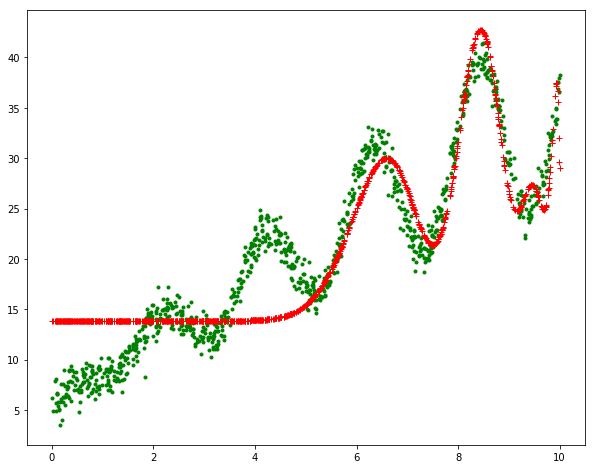

In [30]:
X_d = p_deg.fit_transform(X)
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(X, y, 'g.')
ax.plot(X, poly_reg_d.predict(X_d), 'r+')

In [31]:
inds, sc, sc_t = learning_curve(poly_reg_d, X_d_train, y_train, 
                                X_d_test, y_test, mean_squared_error, 100)

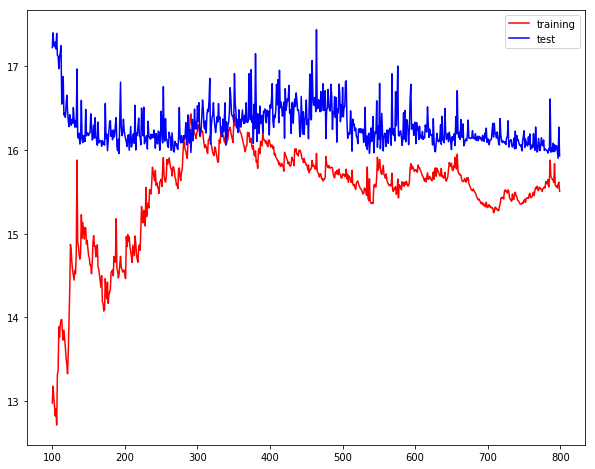

In [32]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(inds, sc, "r-", label="training")
ax.plot(inds, sc_t, "b-", label="test")
ax.legend()

## Taking Things Into Medical Data Sets

In [97]:
from sklearn import datasets

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [99]:
diabetes = datasets.load_diabetes()

In [100]:
print(diabetes.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani